**DATASET inspection**

In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)


2.7.0


In [2]:
#Set seed for reproducibility
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)


In [ ]:
#We load and unzip the images
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/challenge1DL
!unzip dataset.zip

#!unzip '/gdrive/MyDrive/Consegna_FINALE/dataset.zip'

In [5]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd, 'training')

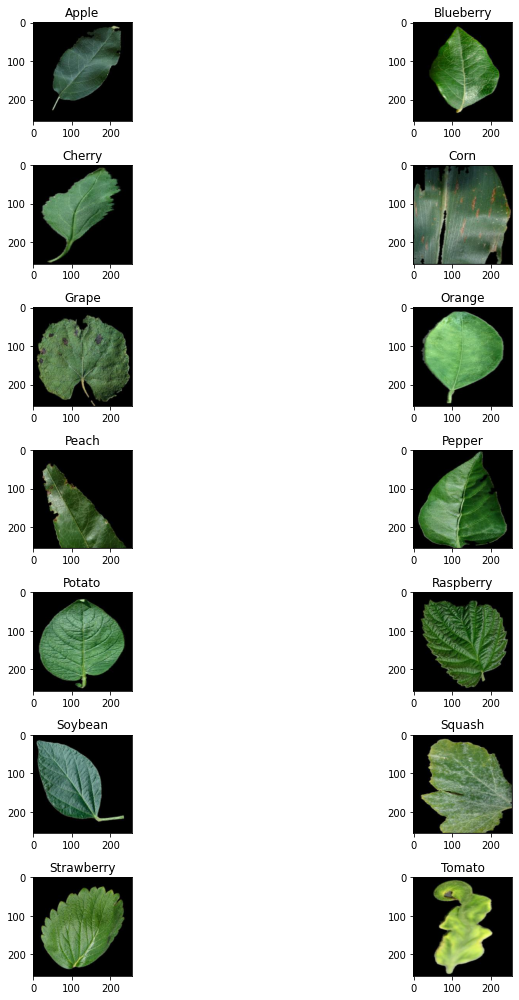

In [6]:
#Inspect the data
#Plot example images from dataset
labels = ['Apple',        #0
          'Blueberry',    #1
          'Cherry',       #2
          'Corn',         #3
          'Grape',        #4
          'Orange',       #5
          'Peach',        #6
          'Pepper',       #7
          'Potato',       #8
          'Raspberry',    #9
          'Soybean',      #10
          'Squash',       #11
          'Strawberry',   #12
          'Tomato']       #13

dataset_dir = os.path.join(cwd, 'training')
num_row = 7
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_row,7*num_col))
for i in range(num_row*num_col):
  if i < 14:
    class_imgs = next(os.walk('{}/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()



In [7]:
# Image data generator + split between TRAINING SET and VALIDATION SET

cwd = os.getcwd()
dataset_dir = os.path.join(cwd, 'training')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input 

# Data Augmentation on the TRAINING SET 

data_augmentation=False

if data_augmentation:

  train_data_gen = ImageDataGenerator(rescale=1/255.,
                                      rotation_range=30,
                                      height_shift_range=50,
                                      width_shift_range=50,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True, 
                                      fill_mode='reflect',
                                      validation_split=0.2) #set the validation split
else:
  train_data_gen = ImageDataGenerator(rescale=1/255.,
                                      validation_split=0.2) #set the validation split


train_generator = train_data_gen.flow_from_directory(directory=dataset_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed,
                                               subset='training')

# Validation Set (to simulate the test set ...) --> NO Data Augmentation

validation_data_gen=ImageDataGenerator(rescale=1/255.,
                                       validation_split=0.2)

validation_generator = validation_data_gen.flow_from_directory(directory=dataset_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed,
                                               subset='validation')                              

Found 14189 images belonging to 14 classes.
Found 3539 images belonging to 14 classes.


In [ ]:
print("Assigned labels")
print(train_generator.class_indices)
print()
print("Target classes")
print(train_generator.classes)

In [9]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(7, 4))
  plt.imshow((image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 14)

Categorical label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: 1
Class name: Blueberry


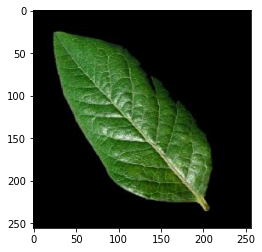

In [62]:
# Get a sample from dataset and show info
_ = get_next_batch(train_generator)
